#Section 1: Introduction to Data and Statistics

### 1.1 What is Data?
- Data is a collection of facts such as numbers, words, measurements, or observations.
- It forms the basis of statistical analysis and machine learning.

### 1.2 Types of Data
- Categorical Data
  - Nominal: No natural order (e.g., Gender, Color).
  - Ordinal: Ordered categories (e.g., Ratings: Low, Medium, High).
- Numerical Data
  - Discrete: Countable values (e.g., Number of students).
  - Continuous: Measurable quantities (e.g., Height, Weight).

In [ ]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Gender': ['Female', 'Male', 'Male'],
    'Satisfaction': ['High', 'Medium', 'Low'],
    'Age': [25, 30, 35],
    'Temperature': [36.6, 37.2, 36.8]
}

df = pd.DataFrame(data)
df

,Name,Gender,Satisfaction,Age,Temperature
0,Alice,Female,High,25,36.6
1,Bob,Male,Medium,30,37.2
2,Charlie,Male,Low,35,36.8


### 1.3 Descriptive vs Inferential Statistics
- Descriptive Statistics
  - Summarizes and describes data.
  - Examples: Mean, Median, Mode, Standard Deviation.
- Inferential Statistics
  - Uses sample data to make inferences about a population.
  - Examples: Hypothesis Testing, Confidence Intervals.

### 1.4 Scales of Measurement

| **Scale** | **Description**                      | **Example**                      |
|-----------|--------------------------------------|----------------------------------|
| Nominal   | Categories with no order             | Colors: Red, Blue, Green         |
| Ordinal   | Ordered categories                   | Satisfaction: Low → High         |
| Interval  | Equal intervals, no true zero        | Temperature in °C                |
| Ratio     | Equal intervals, true zero exists    | Age, Weight, Distance            |



#Section 2: Describing Categorical Data

### 2.1 Frequency Distribution of Categorical Data
- A frequency distribution shows how often each category occurs.
- Helpful to summarize nominal or ordinal data.

In [ ]:
import pandas as pd

data = {'Color': ['Red', 'Blue', 'Green', 'Red', 'Green', 'Blue', 'Red']}
df = pd.DataFrame(data)

# Frequency count
freq = df['Color'].value_counts()
print(freq)

Color
Red      3
Blue     2
Green    2
Name: count, dtype: int64


### 2.2 Best Practices for Graphing Categorical Data
-  bar charts or pie charts for categorical data.
- Avoid histograms (they are for numerical data).

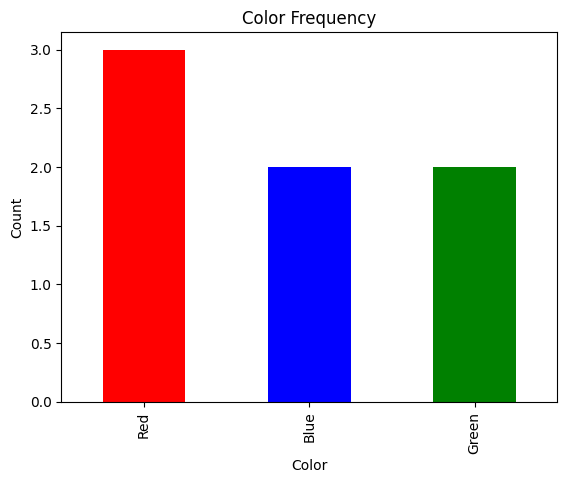

In [ ]:
import matplotlib.pyplot as plt

freq.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title("Color Frequency")
plt.xlabel("Color")
plt.ylabel("Count")
plt.show()

### 2.3 Mode and Median for Categorical Variables
- Mode: Most frequently occurring category.
- Median: Only meaningful for ordinal data (with ordered categories).
- Note: Median is not defined for nominal variables.

In [ ]:
mode_color = df['Color'].mode()[0]
print("Mode:", mode_color)

Mode: Red


#Section 3: Describing Numerical Data

### 3.1 Frequency Tables for Numerical Data
- Grouping data into intervals (called bins) helps in understanding the distribution.

In [ ]:
import pandas as pd

data = {'Scores': [45, 78, 56, 89, 90, 67, 55, 49, 72, 84]}
df = pd.DataFrame(data)

# Frequency table using bins
freq_table = pd.cut(df['Scores'], bins=[40, 60, 70, 80, 100]).value_counts().sort_index()
print(freq_table)

Scores
(40, 60]     4
(60, 70]     1
(70, 80]     2
(80, 100]    3
Name: count, dtype: int64


### 3.2 Measures of Central Tendency
- Mean: Average
- Median: Middle value
- Mode: Most frequent value

In [ ]:
mean = df['Scores'].mean()
median = df['Scores'].median()
mode = df['Scores'].mode()[0]

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)

Mean: 68.5
Median: 69.5
Mode: 45


### 3.3 Quartiles and Percentiles
- Quartiles: Split data into 4 parts
- Percentiles: Split data into 100 parts

In [ ]:
q1 = df['Scores'].quantile(0.25)
q3 = df['Scores'].quantile(0.75)
percentile_90 = df['Scores'].quantile(0.90)

print("Q1:", q1)
print("Q3:", q3)
print("90th Percentile:", percentile_90)

Q1: 55.25
Q3: 82.5
90th Percentile: 89.1


### 3.4 Measures of Dispersion
- Range = Max - Min
- Variance = Average of squared deviations from the mean
- Standard Deviation = Square root of variance
- Interquartile Range (IQR) = Q3 - Q1

In [ ]:
range_val = df['Scores'].max() - df['Scores'].min()
variance = df['Scores'].var()
std_dev = df['Scores'].std()
iqr = q3 - q1

print("Range:", range_val)
print("Variance:", variance)
print("Standard Deviation:", std_dev)
print("IQR:", iqr)

Range: 45
Variance: 277.6111111111111
Standard Deviation: 16.66166591644158
IQR: 27.25


### 3.5 Five Number Summary
- Includes: Min, Q1, Median, Q3, Max

In [ ]:
summary = df['Scores'].describe()
print(summary[['min', '25%', '50%', '75%', 'max']])

min    45.00
25%    55.25
50%    69.50
75%    82.50
max    90.00
Name: Scores, dtype: float64


#Section 4: Association Between Two Variables

### 4.1 Covariance
- Covariance tells us how two variables vary together:
  - Positive value → as one increases, the other tends to increase.
  - Negative value → as one increases, the other tends to decrease.
  - Near zero → no consistent relationship.
- Note: The magnitude of covariance is not standardized, so it depends on units and scale of the variables.

In [ ]:
import pandas as pd

data = {
    'Hours_Studied': [2, 4, 6, 8, 10],
    'Exam_Score': [50, 60, 65, 70, 85]
}
df = pd.DataFrame(data)

covariance = df.cov().iloc[0, 1]
print("Covariance:", covariance)

Covariance: 40.0


### 4.2 Correlation
- Correlation measures the strength and direction of a linear relationship between two variables.
- It is unitless and always lies in the range: –1 to +1.
- ### Correlation Coefficient (r) Interpretation Table

| **Correlation Value (r)** | **Interpretation**                        |
|---------------------------|-------------------------------------------|
| +1.0                      | Perfect positive linear relationship      |
| +0.7 to +0.9              | Strong positive                           |
| +0.4 to +0.6              | Moderate positive                         |
| +0.1 to +0.3              | Weak positive                             |
| 0                         | No correlation                            |
| –0.1 to –0.3              | Weak negative                             |
| –0.4 to –0.6              | Moderate negative                         |
| –0.7 to –0.9              | Strong negative                           |
| –1.0                      | Perfect negative linear relationship      |


In [ ]:
correlation = df.corr().iloc[0, 1]
print("Correlation Coefficient:", correlation)

Correlation Coefficient: 0.9773555548504419


### 4.3 Scatter Plots
- Visual representation of relationship between two numerical variables.
- You can visually see:
  - Upward slope → positive correlation
  - Downward slope → negative correlation
  - No pattern → weak or no correlation

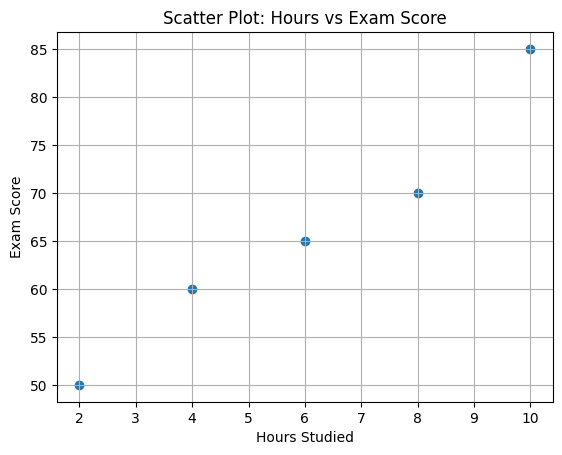

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Hours_Studied'], df['Exam_Score'])
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Scatter Plot: Hours vs Exam Score")
plt.grid(True)
plt.show()

#Section 5: Introduction to Probability


### 5.1 What is Probability?
- Probability measures how likely an event is to occur, expressed as a value between 0 and 1.
  - 0 → Impossible event
  - 1 → Certain event
  - 0.5 → 50-50 chance
- Think of flipping a fair coin:
  - Probability(Heads) = 0.5
  - Probability(Tails) = 0.5

### 5.2 Types of Events
- Simple Event: One outcome (e.g., rolling a 3)
- Compound Event: More than one outcome (e.g., rolling an odd number)
- Complementary Event: Probability of event not happening
  - P(Not A) = 1 – P(A)

### 5.3 Sample Space
- The set of all possible outcomes of a random experiment.

In [ ]:
# Example: Rolling a die
sample_space = [1, 2, 3, 4, 5, 6]
print("Sample Space:", sample_space)

Sample Space: [1, 2, 3, 4, 5, 6]


### 5.4 Classical (Theoretical) Probability
- The probability of an event \( E \) is given by:

$$
P(E) = \frac{\text{Number of favorable outcomes}}{\text{Total number of outcomes}}
$$


In [ ]:
# Probability of rolling a 4 on a die
P_4 = 1 / 6
print("P(rolling 4):", P_4)

P(rolling 4): 0.16666666666666666


### 5.5 Empirical (Experimental) Probability
- Empirical probability is based on actual experiments or observed data. The formula is:

$$
P(E) = \frac{\text{Frequency of } E}{\text{Total number of trials}}
$$


In [ ]:
# Example: 100 students, 60 passed
P_pass = 60 / 100
print("P(Pass):", P_pass)

P(Pass): 0.6


### 5.6 Properties of Probability

1. Probability of any event lies between 0 and 1:

$$
0 \leq P(E) \leq 1
$$

2. The probability of the sample space is 1:

$$
P(S) = 1 \quad \text{(where \( S \) is the sample space)}
$$

3. Addition rule for any two events:

$$
P(A \cup B) = P(A) + P(B) - P(A \cap B)
$$

4. If A and B are **mutually exclusive** (i.e., \( A \cap B = \varnothing \)):

$$
P(A \cup B) = P(A) + P(B)
$$


#Section 6: Conditional Probability & Bayes’ Theorem

### 6.1 What is Conditional Probability?

- Conditional probability measures the probability of an event **given that another event has already occurred**.
- **Notation:**

$$
P(A \mid B) = \frac{P(A \cap B)}{P(B)} \quad \text{(provided } P(B) \ne 0\text{)}
$$

- This reads as:  
  - **"Probability of A given B"** = Probability of both A and B occurring divided by the probability of B.
- **Example:**
  - Let:
    - \( A \) = "student passed math"  
    - \( B \) = "student passed science"  
- Then:

$$
P(A \mid B) = \text{Probability that a student passed math given they passed science}
$$


### 6.2 Independence of Events
- Two events A and B are independent if:

$$
P(A \cap B) = P(A) \cdot P(B)
$$

- Which means the outcome of one does not affect the other.


In [ ]:
# Tossing two coins
P_heads_1 = 0.5
P_heads_2 = 0.5
P_both_heads = P_heads_1 * P_heads_2
print("P(Both heads):", P_both_heads)

P(Both heads): 0.25


### 6.3 Law of Total Probability

If events (B1,B2,.....Bi) are **mutually exclusive** and **exhaustive** (i.e., they cover the entire sample space), then the probability of event \( A \) is given by:

$$
P(A) = \sum_{i=1}^{n} P(A \mid B_i) \cdot P(B_i)
$$

- **Used when** we break down a complex event into smaller, manageable conditional parts based on known partitions of the sample space.


### 6.4 Bayes’ Theorem
- Bayes' Theorem helps us **update probabilities** based on new evidence.

$$
P(B \mid A) = \frac{P(A \mid B) \cdot P(B)}{P(A)}
$$

- Where:

  -  P(B | A) : Posterior probability (probability of **B given A**)
  -  P(A | B) : Likelihood (probability of **A given B**)
  -  P(B) : Prior probability of B  
  -  P(A) : Total probability of A

- **Real-World Example (Medical Test):**
  -  B  = Person **has the disease**  
  -  A  = Person **tests positive**
- Bayes helps us find:

$$
P(\text{Has disease} \mid \text{Tested positive})
$$


In [ ]:
# Example: Bayes' Theorem
P_D = 0.01              # Prior: 1% have disease
P_Pos_D = 0.99          # 99% accurate if diseased
P_Pos_notD = 0.05       # 5% false positive

P_notD = 0.99
P_Pos = P_Pos_D * P_D + P_Pos_notD * P_notD

# Bayes' result
P_D_Pos = (P_Pos_D * P_D) / P_Pos
print("P(Disease | Positive Test):", round(P_D_Pos, 3))

P(Disease | Positive Test): 0.167


#Section 7 – Random Variables (Discrete + Continuous)

### 7.1 Random Variable and its types
  - A random variable assigns numerical values to outcomes of a random experiment.

- Types of Random variables:

| Type           | Description                         | Examples                 |
| -------------- | ----------------------------------- | ------------------------ |
| **Discrete**   | Takes finite/countable values       | No. of heads, dice rolls |
| **Continuous** | Takes values in a range (intervals) | Height, weight, time     |

- Key Takeaway:
  - Random variables convert random outcomes into numerical analysis, forming the base of probabilistic modeling in AI/ML.



### 7.2 Discrete Random Variable
- A **Discrete Random Variable** is defined by a **Probability Mass Function (PMF)**:

$$
P(X = x_i) = p_i \quad \text{where} \quad \sum p_i = 1
$$

- **Example: Dice Roll**

  - Let \( X \) be the number that appears on a fair six-sided die.

$$
P(X = 1) = \frac{1}{6}, \quad P(X = 2) = \frac{1}{6}, \quad \dots, \quad P(X = 6) = \frac{1}{6}
$$


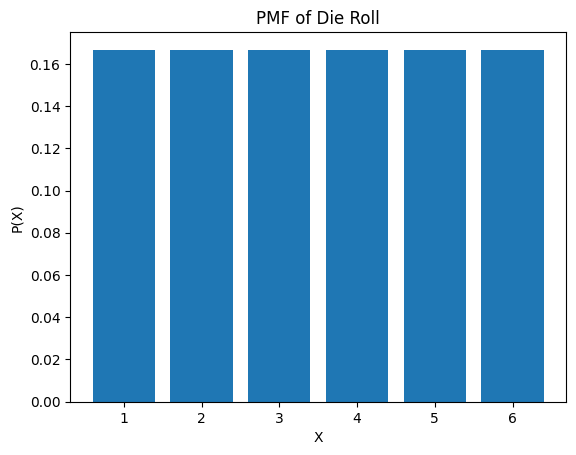

In [ ]:
# PMF of die roll
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6]
p = [1/6]*6
plt.bar(x, p)
plt.title("PMF of Die Roll")
plt.xlabel("X")
plt.ylabel("P(X)")
plt.show()

### 7.3 Continuous Random Variable
- A **Continuous Random Variable** is defined by a **Probability Density Function (PDF)**:

$$
P(a \leq X \leq b) = \int_{a}^{b} f(x) \, dx
$$

  - The probability is **area under the curve** of the PDF between \( a \) and \( b \).
  - The total area under the entire PDF curve is **1**.

- **Example: Height of Students**
  - Heights can take any value within a range (e.g., 150.2 cm, 160.5 cm, etc.)
  - The PDF may resemble a **bell curve** (Normal distribution).


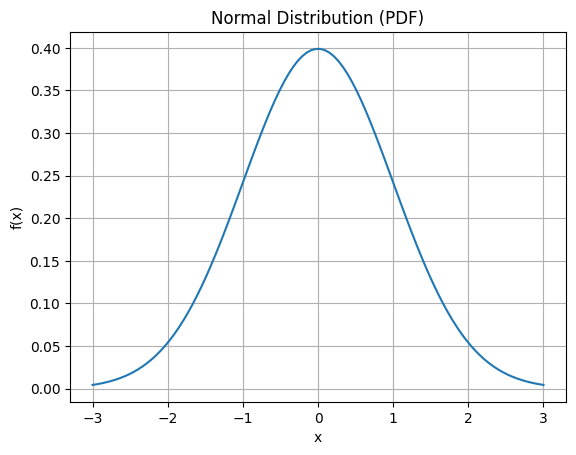

In [ ]:
# Plot of a normal distribution
import numpy as np
from scipy.stats import norm

x = np.linspace(-3, 3, 100)
y = norm.pdf(x, 0, 1)
plt.plot(x, y)
plt.title("Normal Distribution (PDF)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

### 7.4 Cumulative Distribution Function (CDF)
- The **Cumulative Distribution Function (CDF)** gives the probability that the variable takes a value **less than or equal to** \( x \):

$$
F(x) = P(X \leq x)
$$

### 7.5 Expectations and Variance

#### For Discrete Random Variables

- **Expectation (Mean):**

$$
E[X] = \sum x_i \cdot P(X = x_i)
$$

- **Variance:**

$$
\text{Var}(X) = E[X^2] - (E[X])^2
$$


#### For Continuous Random Variables

- **Expectation (Mean):**

$$
E[X] = \int x \cdot f(x) \, dx
$$

- **Variance:**

$$
\text{Var}(X) = \int (x - E[X])^2 \cdot f(x) \, dx
$$

#Section 8: Discrete Distributions – Binomial & Poisson

### Objectives:
- Understand when to use Binomial and Poisson distributions.
- Learn formulas for PMF, mean, and variance.
- Implement examples in Python.
- Visualize distributions.
- Interpret outputs intuitively.

###8.1 Binomial Distribution

- When to Use:
  - You perform n independent trials.
  - Each trial has only two outcomes: **success** or **failure**.
  - The probability of success p is constant across all trials.

-  Probability Mass Function (PMF):

$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
$$

  - where:
    - n is the number of trials  
    - k is the number of successes  
     p is the probability of success in each trial  
    - (1 - p) is the probability of failure  
    - (n k) is the binomial coefficient: number of ways to choose k successes from n trials


- Mean and Variance:

  - **Mean**:  
  $$
  \mu = E[X] = np
  $$

  - **Variance**:  
  $$
  \sigma^2 = Var(X) = np(1 - p)
  $$



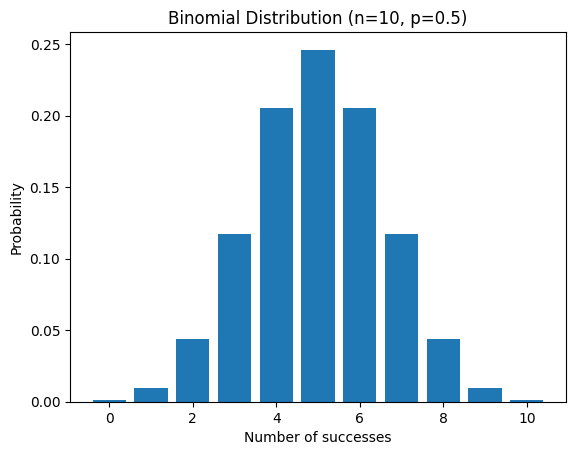

In [ ]:
from scipy.stats import binom
import matplotlib.pyplot as plt

n = 10     # trials
p = 0.5    # success probability

x = range(0, n+1)
pmf = binom.pmf(x, n, p)

plt.bar(x, pmf)
plt.title('Binomial Distribution (n=10, p=0.5)')
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.show()

### 8.2 Poisson Distribution

- Use when:
  - You are counting the number of events occurring in a fixed interval of time or space.
  - Events occur independently.
  - Events happen at a constant average rate.
  - Typically used for rare events in a large population (e.g., defects, arrivals).

-  Probability Mass Function (PMF)

$$
P(X = k) = \frac{e^{-\lambda} \cdot \lambda^k}{k!}
$$

- Parameters

    - λ is the expected number of events in the interval  
    - k is the actual number of events (0, 1, 2, ...)  
    - e is Euler’s number (approximately 2.718)

- Mean and Variance

  - **Mean**: $$\mu = \lambda$$  
  - **Variance**: $$\sigma^2 = \lambda$$


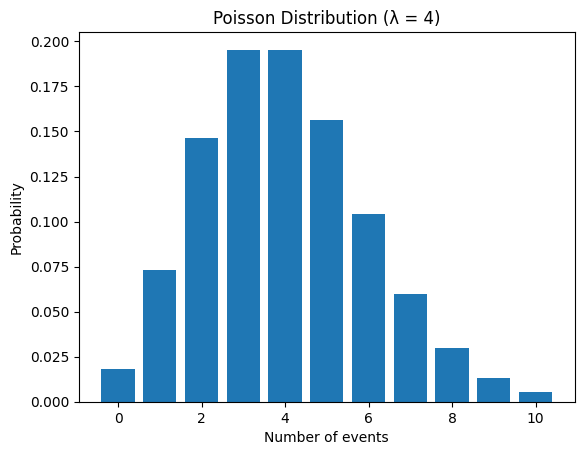

In [ ]:
from scipy.stats import poisson

lam = 4  # expected events per interval
x = range(0, 11)
pmf = poisson.pmf(x, lam)

plt.bar(x, pmf)
plt.title('Poisson Distribution (λ = 4)')
plt.xlabel('Number of events')
plt.ylabel('Probability')
plt.show()

### 8.3 Summary Table

| Concept     | Binomial Distribution                           | Poisson Distribution                             |
|-------------|--------------------------------------------------|--------------------------------------------------|
| **PMF Formula** | $\displaystyle P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$ | $\displaystyle P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}$ |
| **Mean**        | $\mu = np$                                    | $\mu = \lambda$                                  |
| **Variance**    | $\sigma^2 = np(1-p)$                          | $\sigma^2 = \lambda$                             |
| **Support**     | $k = 0, 1, 2, \dots, n$                       | $k = 0, 1, 2, \dots$                              |
| **Parameters**  | $n$: number of trials  <br> $p$: probability of success | $\lambda$: expected number of events             |


# Section 9: Continuous Distributions – Uniform, Exponential, Normal

### 9.1 Uniform Distribution

- **When to Use:**
  - Every outcome in an interval $[a, b]$ is equally likely.
  - Useful in simulations and random sampling.

- **PDF Formula:**

$$
f(x) =
\begin{cases}
\frac{1}{b - a}, & \text{for } a \leq x \leq b \\\\
0, & \text{otherwise}
\end{cases}
$$

- **Mean:**

$$
\mu = \frac{a + b}{2}
$$

- **Variance:**

$$
\sigma^2 = \frac{(b - a)^2}{12}
$$


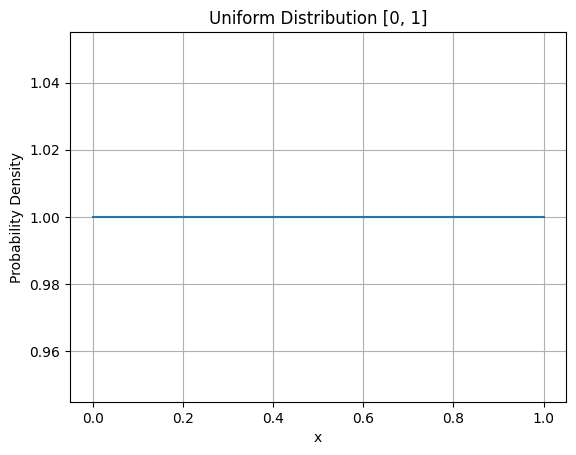

In [ ]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import numpy as np

a, b = 0, 1
x = np.linspace(a, b, 100)
pdf = uniform.pdf(x, a, b-a)

plt.plot(x, pdf)
plt.title('Uniform Distribution [0, 1]')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

## 9.2 Exponential Distribution

- **When to Use:**
  - Models the time until the next event (e.g., time between arrivals).
  - Has the memoryless property: the probability of future events is independent of the past.

- **PDF Formula:**

$$
f(x; \lambda) = \lambda e^{-\lambda x}, \quad x \geq 0
$$

- **Mean:**

$$
\mu = \frac{1}{\lambda}
$$

- **Variance:**

$$
\sigma^2 = \frac{1}{\lambda^2}
$$


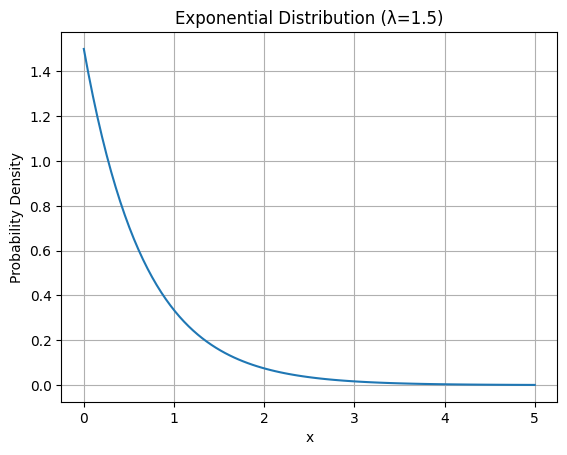

In [ ]:
from scipy.stats import expon

lambd = 1.5
x = np.linspace(0, 5, 100)
pdf = expon.pdf(x, scale=1/lambd)

plt.plot(x, pdf)
plt.title('Exponential Distribution (λ=1.5)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

## 9.3 Normal Distribution (Gaussian)

- **When to Use:**
  - Many real-world phenomena follow this (e.g., height, IQ, measurement noise).
  - Central Limit Theorem: sums of random variables tend to be normally distributed.

- **PDF Formula:**

$$
f(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} \, e^{- \frac{(x - \mu)^2}{2\sigma^2}}
$$

- **Mean:**

$$
\mu
$$

- **Variance:**

$$
\sigma^2
$$


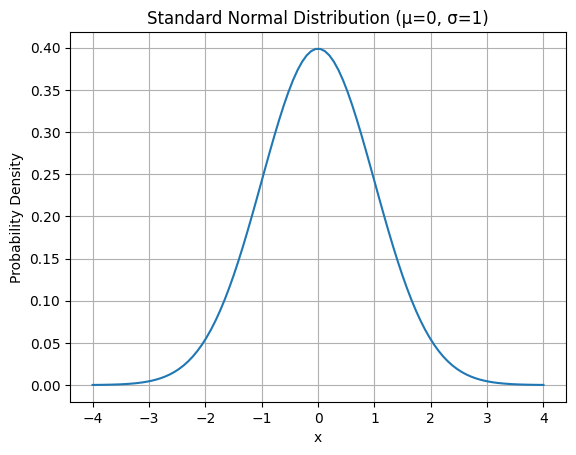

In [ ]:
from scipy.stats import norm

mu, sigma = 0, 1
x = np.linspace(-4, 4, 100)
pdf = norm.pdf(x, mu, sigma)

plt.plot(x, pdf)
plt.title('Standard Normal Distribution (μ=0, σ=1)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

### 9.4 Summary Table

| Distribution | PDF Expression               | Mean                | Variance              | Use Case                              |
| ------------ | ---------------------------- | ------------------- | --------------------- | ------------------------------------- |
| Uniform      | $\frac{1}{b-a}$              | $\frac{a+b}{2}$     | $\frac{(b-a)^2}{12}$  | Equal chance within an interval       |
| Exponential  | $\lambda e^{-\lambda x}$     | $\frac{1}{\lambda}$ | $\frac{1}{\lambda^2}$ | Time until next event                 |
| Normal       | $\frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$ | $\mu$ | $\sigma^2$ | Measurement errors, natural phenomena |


#Section 10: Joint & Marginal Distributions, Functions of Multiple Variables

### 10.1 Joint Distribution

- Joint distribution describes the probability of two or more random variables occurring simultaneously.

#### For Discrete Variables:
$$
P(X = x, Y = y)
$$

#### For Continuous Variables:
$$
f(x, y) = \text{joint probability density function}
$$


In [ ]:
import numpy as np
import pandas as pd

# Define joint distribution as a DataFrame (PMF)
joint_pmf = pd.DataFrame({
    'Y=0': [0.1, 0.2],
    'Y=1': [0.2, 0.5]
}, index=['X=0', 'X=1'])

print("Joint PMF:")
print(joint_pmf)

Joint PMF:
     Y=0  Y=1
X=0  0.1  0.2
X=1  0.2  0.5


### 10.2 Marginal Distribution

- Marginal distribution is the probability distribution of a single variable obtained from the joint distribution.

#### For Discrete Variables:
$$
P(X = x) = \sum_{y} P(X = x, Y = y)
$$


In [ ]:
# Marginal of X
marginal_x = joint_pmf.sum(axis=1)
print("\nMarginal Distribution of X:")
print(marginal_x)

# Marginal of Y
marginal_y = joint_pmf.sum(axis=0)
print("\nMarginal Distribution of Y:")
print(marginal_y)


Marginal Distribution of X:
X=0    0.3
X=1    0.7
dtype: float64

Marginal Distribution of Y:
Y=0    0.3
Y=1    0.7
dtype: float64


### 10.3 Independence
  
- Two variables \( X \) and \( Y \) are **independent** if:

$$
P(X = x, Y = y) = P(X = x) \cdot P(Y = y)
$$


In [ ]:
# Check if P(X=0, Y=0) == P(X=0)*P(Y=0)
is_independent = np.isclose(joint_pmf.loc['X=0', 'Y=0'],
                            marginal_x['X=0'] * marginal_y['Y=0'])
print("\nAre X and Y independent at (X=0, Y=0)?", is_independent)


Are X and Y independent at (X=0, Y=0)? False


### 10.4 Function of Multiple Random Variables

- Given two variables \( X \) and \( Y \), we can define a new variable:

$$
Z = g(X, Y)
$$


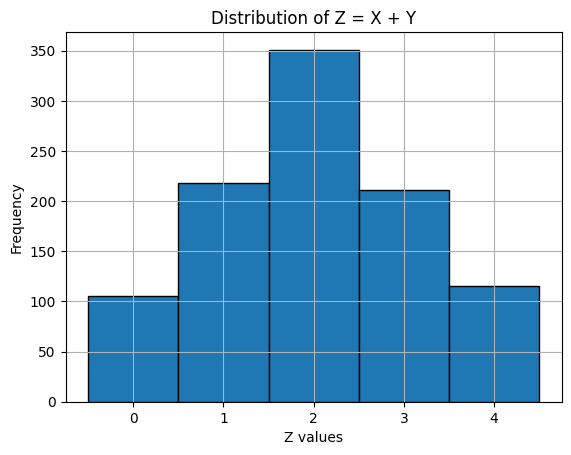

In [ ]:
#Function Z = X + Y
# Simulate X and Y
X = np.random.randint(0, 3, 1000)
Y = np.random.randint(0, 3, 1000)

Z = X + Y

import matplotlib.pyplot as plt
plt.hist(Z, bins=range(0, 6), align='left', edgecolor='black')
plt.title('Distribution of Z = X + Y')
plt.xlabel('Z values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#Section 11: Expectations, Variance, Covariance & Correlation

## 11.1 Expectation (Mean)

- The **expected value** (or mean) is the long-run average value of a random variable.

- **Discrete:**

$$
E[X] = \sum x_i \cdot P(X = x_i)
$$

- **Continuous:**

$$
E[X] = \int x \cdot f(x) \, dx
$$

- **Interpretation:** The expected value is what you "expect" on average.

In [ ]:
import numpy as np

# Simulate a discrete random variable
X = np.array([0, 1, 2])
P_X = np.array([0.2, 0.5, 0.3])  # Probabilities must sum to 1

# Expectation
E_X = np.sum(X * P_X)
print("E[X] =", E_X)

E[X] = 1.1


## 11.2  Variance and Standard Deviation
- Variance measures the **spread or dispersion** of a random variable from its mean.

$$
\text{Var}(X) = E[(X - E[X])^2] = E[X^2] - (E[X])^2
$$

- **Standard Deviation**:

$$
\sigma = \sqrt{\text{Var}(X)}
$$

- **Interpretation:**  
  - High variance → more spread out  
  - Low variance → values concentrated around the mean

In [ ]:
# Variance
Var_X = np.sum((X - E_X) ** 2 * P_X)
Std_X = np.sqrt(Var_X)

print("Var[X] =", Var_X)
print("Std[X] =", Std_X)

Var[X] = 0.49
Std[X] = 0.7


## 11.3  Covariance
- Covariance shows how **two random variables change together**.

$$
\text{Cov}(X, Y) = E[(X - E[X])(Y - E[Y])]
$$

- **Interpretation:**

  - Cov(X, Y) > 0 : X and Y increase together  
  - Cov(X, Y) < 0 : X increases, Y tends to decrease  
  - Cov(X, Y) = 0 : No linear relationship  

- **Units of covariance** = product of units of X and Y

In [ ]:
# Sample data
x = np.random.normal(5, 1, 1000)
y = 2 * x + np.random.normal(0, 1, 1000)

cov_matrix = np.cov(x, y)
print("Covariance Matrix:\n", cov_matrix)
print("Cov(X, Y):", cov_matrix[0, 1])

Covariance Matrix:
 [[0.9110488  1.83660888]
 [1.83660888 4.69279507]]
Cov(X, Y): 1.8366088836089924


## 11.4 Correlation
- Correlation is the **normalized version** of covariance, bounded between -1 and +1.

$$
\rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \cdot \sigma_Y}
$$

- **Interpretation:**

  - ρ = 1 : Perfect positive linear relationship  
  - ρ = -1 : Perfect negative linear relationship  
  - ρ = 0 : No linear relationship

In [ ]:
# Pearson correlation coefficient
correlation = np.corrcoef(x, y)
print("Correlation Matrix:\n", correlation)
print("Corr(X, Y):", correlation[0, 1])

Correlation Matrix:
 [[1.         0.88823947]
 [0.88823947 1.        ]]
Corr(X, Y): 0.8882394678202017


## 11.5 What do these values mean?

| Value of $\text{Corr}(X, Y)$ | Interpretation                      |
|-----------------------------|-------------------------------------|
| +1                          | Perfect positive correlation        |
| $\sim 0.7$ to $1$           | Strong positive linear relationship |
| 0                           | No linear correlation               |
| $\sim -0.7$ to $-1$         | Strong negative linear relationship |
| -1                          | Perfect negative correlation        |


## 11.6 Summary Table

| **Concept**     | **Measures**         | **Formula**                                                                 | **Range**            |
|------------------|----------------------|-----------------------------------------------------------------------------|----------------------|
| **Mean**         | Central tendency     | $$E[X]$$                                                                    | $$\mathbb{R}$$       |
| **Variance**     | Spread               | $$E[X^2] - (E[X])^2$$                                                       | $$\geq 0$$           |
| **Covariance**   | Joint variability    | $$E[(X - E[X])(Y - E[Y])]$$                                                 | $$\mathbb{R}$$       |
| **Correlation**  | Linear association   | $$\rho_{X,Y} = \frac{\text{Cov}(X,Y)}{\sigma_X \cdot \sigma_Y}$$           | $$-1 \text{ to } 1$$ |



#Section 12: Sampling, Estimation & Inference

### 12.1 Sampling

- Population: The entire group we want to study.
- Sample: A subset drawn from the population.
- Sampling methods: Random, stratified, cluster, etc.
- Sampling helps estimate unknown population parameters.

In [ ]:
import numpy as np

population = np.arange(1, 101)  # Population of size 100
sample = np.random.choice(population, size=10, replace=False)
print("Sample:", sample)

Sample: [13 56 78 51 97 72 28  6 65 53]


### 12.2 Point Estimation
- A point estimator gives a single best guess of a population parameter.

| Parameter              | Estimator              |
|------------------------|------------------------|
| Population Mean $\mu$  | Sample Mean $\bar{x}$  |
| Population Variance $\sigma^2$ | Sample Variance $s^2$ |


In [ ]:
# Estimate mean and variance from sample
sample_mean = np.mean(sample)
sample_var = np.var(sample, ddof=1)

print("Estimated Mean:", sample_mean)
print("Estimated Variance:", sample_var)

Estimated Mean: 51.9
Estimated Variance: 833.4333333333334


### 12.3 Confidence Intervals

- A confidence interval (CI) gives a range where the true parameter lies, with a given level of confidence (e.g., 95%).

- **Formula**:  
$$
CI = \bar{x} \pm z^* \cdot \frac{s}{\sqrt{n}}
$$

- Where:  
  - $\bar{x}$ = sample mean  
  - $z^*$ = z-value for the desired confidence level (e.g., 1.96 for 95%)  
  - $s$ = sample standard deviation  
  - $n$ = sample size


In [ ]:
#95% CI for the mean
import scipy.stats as stats

n = len(sample)
z_star = stats.norm.ppf(0.975)  # for 95% confidence
margin = z_star * (sample_var ** 0.5) / np.sqrt(n)
ci_lower = sample_mean - margin
ci_upper = sample_mean + margin

print(f"95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")

95% CI: [34.01, 69.79]


### 12.4 Inference
- Statistical inference is drawing conclusions about populations from samples.
- Two main branches:
  - Estimation (Point & Interval)
  - Hypothesis Testing (next section)

#Section 13: Bayesian Estimation

### 13.1 Introduction to Bayesian Thinking

 **Key Concepts**

- **Prior** ($P(\theta)$): What we believe about a parameter before seeing data.
- **Likelihood** ($P(\text{Data} \mid \theta)$): Probability of observed data given the parameter.
- **Posterior** ($P(\theta \mid \text{Data})$): Updated belief about the parameter after seeing data.

**Bayesian Formula**  
- Bayes’ Theorem in parameter estimation:

$$
\text{Posterior} \propto \text{Likelihood} \times \text{Prior}
$$

- Or more formally:

$$
P(\theta \mid \text{Data}) = \frac{P(\text{Data} \mid \theta) \cdot P(\theta)}{P(\text{Data})}
$$


### 13.2 Example: Estimating a Proportion
- Scenario:
  - You're estimating the probability that a coin is biased towards heads. You start with a prior belief and update it after observing coin flips.

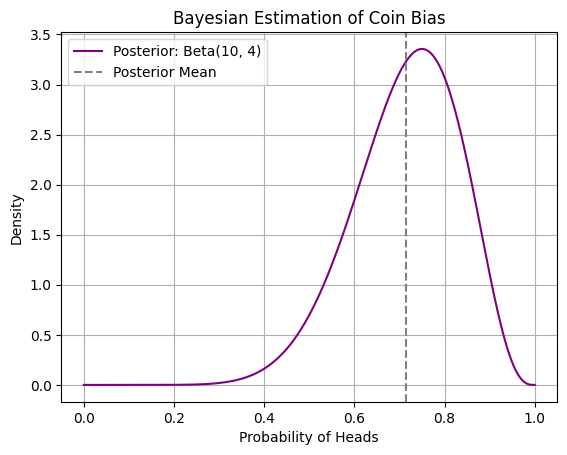

In [ ]:
#Beta Prior + Binomial Likelihood
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Prior belief: Beta(2, 2) - roughly uniform
a_prior, b_prior = 2, 2

# Observed data: 8 heads, 2 tails
heads = 8
tails = 2

# Posterior is Beta(a + heads, b + tails)
a_post = a_prior + heads
b_post = b_prior + tails

x = np.linspace(0, 1, 1000)
plt.plot(x, beta.pdf(x, a_post, b_post), label=f'Posterior: Beta({a_post}, {b_post})', color='purple')
plt.axvline((a_post)/(a_post+b_post), color='gray', linestyle='--', label='Posterior Mean')
plt.title("Bayesian Estimation of Coin Bias")
plt.xlabel("Probability of Heads")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

#### What the Graph Tells Us (Bayesian Posterior)

**1. Bell-shaped Curve (Beta Distribution)**  
- The purple curve represents the posterior distribution:

$$
P(\theta \mid \text{data}) \propto P(\text{data} \mid \theta) \cdot P(\theta)
$$

- The **peak** shows the most probable value of $\theta$ after combining prior belief and observed evidence.


**2. Posterior Mean (gray dashed line)**  
- This is the expected value of the updated belief:

$$
\text{Posterior Mean} = \frac{a + \text{heads}}{a + b + \text{trials}} = \frac{10}{12} = 0.833
$$

- It represents the **best guess** for $\theta$ based on both prior and observed data.

**3. Updated Confidence**  
- The posterior curve is **narrower** than the prior, meaning:

  - Increased confidence in the estimate.
  - If more data were collected, the posterior would become even more concentrated.

**4. Prior Influence**  
- The prior used here is $\text{Beta}(2, 2)$ — roughly **uniform**, indicating no strong initial belief.
- If we had a **strong prior** (e.g., $\text{Beta}(10, 2)$), it would take more extreme data to change the belief.



**Interpretation**:  
- After seeing **8 heads and 2 tails**, the **most likely probability** of heads is approximately **0.83**, and we are fairly confident in this estimate due to the peaked shape of the posterior.


### 13.3 Posterior Mean and MAP

 **Posterior Mean** (for Beta prior with Binomial likelihood):
- If the prior is $\text{Beta}(a, b)$ and we observe data with `heads` and `total trials`, then:

$$
\text{Posterior Mean} = \frac{a + \text{heads}}{a + b + \text{total trials}}
$$

**MAP Estimate**:  
- Maximum A Posteriori estimate = Mode of the posterior distribution.
- For a Beta distribution with posterior $\text{Beta}(a', b')$, the MAP is:

$$
\text{MAP} = \frac{a' - 1}{a' + b' - 2} \quad \text{(for } a' > 1 \text{ and } b' > 1\text{)}
$$


In [ ]:
posterior_mean = a_post / (a_post + b_post)
map_estimate = (a_post - 1) / (a_post + b_post - 2)

print("Posterior Mean:", posterior_mean)
print("MAP Estimate:", map_estimate)

Posterior Mean: 0.7142857142857143
MAP Estimate: 0.75


#Section 14: Hypothesis Testing I – One Sample & Two Sample Tests


### 14.1 What is Hypothesis Testing?

- Hypothesis testing is a **statistical method** used to make decisions or inferences about **population parameters** based on **sample data**.
-  Key Terms

| **Term**                   | **Description**                                                                 |
|----------------------------|---------------------------------------------------------------------------------|
| **Null Hypothesis ($H_0$)**        | A default assumption that there is **no effect** or **no difference**.              |
| **Alternative Hypothesis ($H_1$)** | A statement that **contradicts $H_0$** — there **is** an effect or difference.      |
| **Test Statistic**         | A value calculated from the sample data used to assess how far the result deviates from $H_0$. |
| **p-value**                | The probability of obtaining results at least as extreme as those observed, assuming $H_0$ is true. |
| **Significance Level ($\alpha$)** | A threshold (commonly $\alpha = 0.05$) — if $p$-value < $\alpha$, **reject $H_0$**.       |

-  Decision Rule:
  - If $p$-value $\leq \alpha$: **Reject $H_0$**
  - If $p$-value $> \alpha$: **Fail to Reject $H_0$**

This process helps determine whether observed effects are **statistically significant** or likely due to **random chance**.


### 14.2 One-Sample t-test

- Use Case:
  - Used to test if a **sample mean** significantly differs from a **known population mean**.
  - **Example:**  
    A brand claims its energy bar contains **200 calories** on average. You want to test this using a sample of bars.

-  Hypotheses:

  - **Null Hypothesis ($H_0$):** $\mu = 200$  
  (The mean calories is 200)

  - **Alternative Hypothesis ($H_1$):** $\mu \ne 200$  
  (The mean calories is not 200)

- Test Statistic Formula:

$$
t = \frac{\bar{x} - \mu}{s / \sqrt{n}}
$$

- Where:  
  - $\bar{x}$ = sample mean  
  - $\mu$ = population mean  
  - $s$ = sample standard deviation  
  - $n$ = sample size  

- Decision Rule:
  - Calculate the $t$-statistic and compare it to the **critical t-value** from the t-distribution table (based on $n-1$ degrees of freedom).
  - Or, calculate the **p-value** and:
    - If $p$-value $\leq \alpha$, **reject $H_0$**
    - If $p$-value $> \alpha$, **fail to reject $H_0$**

- When to Use:
  - You have a **small sample size** ($n < 30$)
  - Population **standard deviation is unknown**


In [ ]:
from scipy import stats
import numpy as np

# Sample data
sample = [202, 198, 203, 199, 205, 197, 200, 201, 196, 204]

# Known population mean
pop_mean = 200

# One-sample t-test
t_stat, p_val = stats.ttest_1samp(sample, pop_mean)

print(f"Sample Mean: {np.mean(sample):.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

Sample Mean: 200.50
T-statistic: 0.5222
P-value: 0.6141


Interpretation:
- If p-value < α (say 0.05), reject H₀ → the mean significantly differs from 200.

- If p-value >= α, we fail to reject H₀ → sample is consistent with mean = 200.

### 14.3 Two-Sample t-test

- **Use Case:**
  - Used to test if the **means of two independent groups** are significantly different.
  - **Example:**  
    Compare **math test scores** between **Class A** and **Class B**.

- **Hypotheses:**

  - **Null Hypothesis ($H_0$):** $\mu_1 = \mu_2$  
    (The two group means are equal)

  - **Alternative Hypothesis ($H_1$):** $\mu_1 \ne \mu_2$  
    (The two group means are different)

- **Test Statistic Formula (Equal Variance Assumed):**

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \cdot \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$

- Where:
  - $\bar{x}_1, \bar{x}_2$ = sample means  
  - $n_1, n_2$ = sample sizes  
  - $s_p$ = **pooled standard deviation**, computed as:
$$
s_p = \sqrt{ \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2} }
$$
  - $s_1, s_2$ = standard deviations of samples 1 and 2


- **Decision Rule:**
  - Calculate the $t$-statistic and compare it with the **critical value** from the t-distribution with $n_1 + n_2 - 2$ degrees of freedom.
  - Or, compute the **p-value**:
    - If $p$-value $\leq \alpha$, **reject $H_0$**
    - If $p$-value $> \alpha$, **fail to reject $H_0$**

- **When to Use:**
  - You want to compare **two independent groups**
  - Population standard deviations are **unknown**
  - Optionally assume equal or unequal variances (Welch’s t-test for unequal variances)


In [ ]:
class_A = [78, 82, 85, 88, 90, 87, 83, 89]
class_B = [75, 78, 74, 77, 79, 76, 78, 80]

# Two-sample independent t-test
t_stat, p_val = stats.ttest_ind(class_A, class_B)

print(f"Mean of Class A: {np.mean(class_A):.2f}")
print(f"Mean of Class B: {np.mean(class_B):.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

Mean of Class A: 85.25
Mean of Class B: 77.12
T-statistic: 5.0602
P-value: 0.0002


Interpretation:
- If p-value < α, we reject H₀ → there's a significant difference between the two classes.
- If p-value >= α, the difference is not statistically significant.

### 14.4 Summary Table

| **Test Type**         | **Purpose**                                       | **Sample Size** | **Population Std Known?** | **Use t/z?** |
|-----------------------|---------------------------------------------------|------------------|----------------------------|--------------|
| One-Sample t-test     | Test sample mean vs. population mean              | 1 group          |  No                      | t-test       |
| Two-Sample t-test     | Compare means of two independent samples          | 2 groups         |  No                      | t-test       |
| Z-test                | Test mean(s) when population std. dev. is known   | 1 or 2 groups    |  Yes                     | z-test       |


####14.5 Intuition
- The p-value tells you how unusual your data is assuming H₀ is true.
- If the p-value is small, your sample is unlikely under H₀, hence you reject H₀.
- Always report the effect size along with statistical significance when possible.



#Section 15: Hypothesis Testing II – Errors, Power, and Practical Interpretation


### 15.1 Types of Errors in Hypothesis Testing

| **Error Type**            | **Description**                                                                                   |
|---------------------------|-------------------------------------------------------------------------------------------------|
| **Type I Error** α  | Rejecting a true \(H_0\) (false positive) — e.g., saying there's a difference when there isn't. |
| **Type II Error** β  | Failing to reject a false \(H_0\) (false negative) — e.g., missing a real effect.               |

- Confidence Level vs Significance Level

$$
\text{Confidence Level} = 1 - \alpha
$$

  - How confident you are in your test.
  - Common choice: \(α = 0.05\) → 95% confidence.


### 15.2 Power of a Test

$$
\text{Power} = 1 - \beta
$$

- It is the probability of **correctly rejecting a false** \( H_0 \). A high power means the test is more likely to detect true effects.

- Factors that Affect Power:
   - **Effect size** (difference between means)
  - **Sample size**
  - **Significance level** \((\alpha)\)
  - **Variance** in data


In [ ]:
#Type I & II Errors
import numpy as np
from scipy.stats import ttest_1samp

np.random.seed(42)

# Simulate 1000 experiments
n_experiments = 1000
n = 30
mu_true = 0
mu_test = 0.5  # under H1
alpha = 0.05

type1_errors = 0
type2_errors = 0

for _ in range(n_experiments):
    # Simulating under H0
    sample_h0 = np.random.normal(mu_true, 1, n)
    t_stat, p_val = ttest_1samp(sample_h0, mu_true)
    if p_val < alpha:
        type1_errors += 1

    # Simulating under H1
    sample_h1 = np.random.normal(mu_test, 1, n)
    t_stat, p_val = ttest_1samp(sample_h1, mu_true)
    if p_val >= alpha:
        type2_errors += 1

print(f"Type I Error Rate (α): {type1_errors/n_experiments:.3f}")
print(f"Type II Error Rate (β): {type2_errors/n_experiments:.3f}")
print(f"Power of the Test: {1 - type2_errors/n_experiments:.3f}")

Type I Error Rate (α): 0.052
Type II Error Rate (β): 0.259
Power of the Test: 0.741


####Practical Interpretation
- A p-value < 0.05 doesn’t prove H₁ is true — it just suggests the data is unlikely under H₀.

- Always consider the practical effect size — small p-values with tiny effect sizes may not be meaningful.

- Be mindful of multiple comparisons — doing many tests increases chance of Type I errors (use Bonferroni correction, etc.).



### 15.3 Summary table

| **Concept**           | **Meaning**                                                                 |
|-----------------------|------------------------------------------------------------------------------|
| **Type I Error** (\(\alpha\))    | False positive — rejecting true \(H_0\)                                             |
| **Type II Error** (\(\beta\))    | False negative — failing to reject false \(H_0\)                                    |
| **Power**             | Probability of correctly rejecting a false \(H_0\); \(1 - \beta\)                              |
| **Significance Level** | \(\alpha\), commonly 0.05 (5%)                                                  |
| **Confidence Level**   | \(1 - \alpha\) (e.g., 95%)                                                     |


#Naive Bayes Classifier (from scratch)

Problem Setup:
- We’ll implement a simple Naive Bayes classifier for categorical data (like weather conditions) and demonstrate training and prediction.



In [47]:
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

# Sample categorical dataset (Play Tennis Example)
data = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'],
    'Temperature': ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild'],
    'Humidity': ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'],
    'Windy': ['FALSE', 'TRUE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'FALSE', 'TRUE'],
    'Play': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

In [48]:
# Encode categorical features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [49]:
# Label Encoding for features
encoders = [LabelEncoder() for _ in range(X.shape[1])]
X_encoded = X.copy()
for i, col in enumerate(X.columns):
    X_encoded[col] = encoders[i].fit_transform(X[col])

In [50]:
# Label encoding for target
label_enc = LabelEncoder()
y_encoded = label_enc.fit_transform(y)

In [51]:
# Convert to numpy
X_np = X_encoded.to_numpy()
y_np = np.array(y_encoded)

In [52]:
#Naive Bayes Classifier Class
class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.priors = {cls: np.mean(y == cls) for cls in self.classes}
        self.cond_probs = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))

        for cls in self.classes:
            X_cls = X[y == cls]
            for col in range(X.shape[1]):
                values, counts = np.unique(X_cls[:, col], return_counts=True)
                total = len(X_cls)
                for val, count in zip(values, counts):
                    self.cond_probs[cls][col][val] = count / total

    def predict(self, x):
        posteriors = {}
        for cls in self.classes:
            posterior = self.priors[cls]
            for i, val in enumerate(x):
                prob = self.cond_probs[cls][i].get(val, 1e-6)  # Smoothing
                posterior *= prob
            posteriors[cls] = posterior
        return max(posteriors, key=posteriors.get)

In [53]:
# Train the model
model = NaiveBayes()
model.fit(X_np, y_np)

In [54]:
# Predict a new instance (encoded like the training data)
sample_raw = ['sunny', 'cool', 'normal', 'FALSE']
sample_encoded = [encoders[i].transform([val])[0] for i, val in enumerate(sample_raw)]

In [55]:
# Predict and decode output
prediction = model.predict(sample_encoded)
print("Predicted class:", label_enc.inverse_transform([prediction])[0])

Predicted class: yes


# A/B Testing Framework

- Use Case
  - Compare conversion rates or accuracies between Model A and Model B to decide if one is significantly better.

- Assumptions:
  - We're comparing the proportion of success (e.g., clicks, conversions, model accuracy) between two groups.
  - Each group is a Bernoulli distribution (success/failure) → use z-test for proportions.


In [56]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

In [57]:
# Simulated data:
# A - Old model or version
# B - New model or version

# Assume we're comparing conversion rates (or model accuracy on test samples)

# Group A: 1000 users, 200 converted
# Group B: 980 users, 240 converted

successes = np.array([200, 240])
samples = np.array([1000, 980])

In [58]:
# Perform two-proportion z-test (default is two-sided)
z_stat, p_value = proportions_ztest(count=successes, nobs=samples)

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference between A and B")
else:
    print("Fail to reject the null hypothesis: No significant difference between A and B")

Z-statistic: -2.4026
P-value: 0.0163
Reject the null hypothesis: Significant difference between A and B


#Sampling Simulation – Central Limit Theorem (CLT)

Objective:
- Show that the distribution of the sample means approximates a normal distribution as the number of samples increases, regardless of the population distribution.

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

In [60]:
# Step 1: Generate a non-normal population (e.g., exponential distribution)
population = np.random.exponential(scale=2.0, size=100000)

In [61]:
# Step 2: Function to draw multiple samples and compute their means
def draw_sample_means(sample_size=30, num_samples=1000):
    means = []
    for _ in range(num_samples):
        sample = np.random.choice(population, size=sample_size, replace=False)
        means.append(np.mean(sample))
    return means

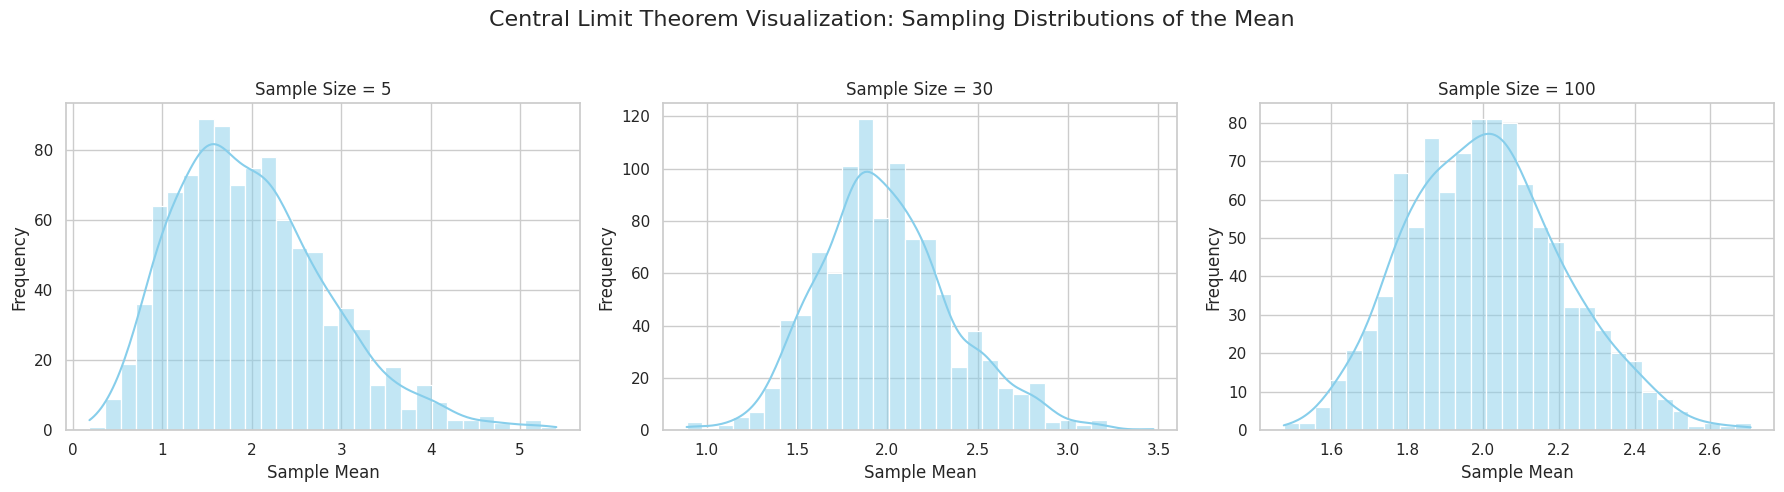

In [62]:
# Step 3: Draw sample means for different sample sizes
sample_sizes = [5, 30, 100]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, size in enumerate(sample_sizes):
    sample_means = draw_sample_means(sample_size=size)
    sns.histplot(sample_means, kde=True, ax=axes[i], bins=30, color='skyblue')
    axes[i].set_title(f"Sample Size = {size}")
    axes[i].set_xlabel("Sample Mean")
    axes[i].set_ylabel("Frequency")

fig.suptitle("Central Limit Theorem Visualization: Sampling Distributions of the Mean", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

What This Does:
- Starts with a non-normal population (Exponential).
- Draws repeated random samples of size 5, 30, and 100.
- Plots the distribution of sample means for each case.
- As sample size increases:
  - Distribution becomes more symmetric
  - Shape becomes closer to normal
  - Variance reduces



# Final Summary: Probability & Statistics for AI/ML

This notebook explored essential concepts in **Probability and Statistics**, building a solid foundation for understanding **uncertainty, decision-making, and inference** in Machine Learning. Each concept is reinforced with intuitive explanations, NumPy/Python-based simulations, and AI-relevant applications.

###**Key Concepts Covered**

* **Descriptive Statistics**  
  - Central tendency: mean, median, mode  
  - Dispersion: variance, standard deviation, IQR  
  - Visualizations: histograms, boxplots, bar charts

* **Probability Theory**  
  - Axioms of probability, sample space, events  
  - Conditional probability and **Bayes' Theorem**  
  - Independence and Law of Total Probability

* **Random Variables**  
  - Discrete: Bernoulli, Binomial, Poisson  
  - Continuous: Uniform, Exponential, Normal  
  - PMF, PDF, and CDF functions

* **Joint, Marginal, and Conditional Distributions**  
  - Joint probability tables  
  - Marginalization  
  - Independence in multivariate settings

* **Expectation, Variance, Covariance, Correlation**  
  - $E[X]$, $Var(X)$, $Cov(X, Y)$, $Corr(X, Y)$  
  - Covariance matrix and interpretation

* **Sampling and Estimation**  
  - Law of Large Numbers & Central Limit Theorem  
  - Confidence intervals and standard error  
  - Point vs interval estimation

* **Hypothesis Testing**  
  - Null vs alternative hypotheses  
  - $z$-test, $t$-test, $p$-values, and critical values  
  - One-sample and two-sample testing  
  - Type I & Type II errors, power of a test

* **Bayesian Estimation**  
  - Prior, likelihood, posterior  
  - MAP vs MLE  
  - Bayesian inference basics

---

###  **From-Scratch ML Implementations**

* **Naive Bayes Classifier**  
  - Using conditional probability and Bayes’ Theorem

* **A/B Testing Framework**  
  - Implementing hypothesis testing for model comparison

* **Sampling Simulations**  
  - Central Limit Theorem visualization with repeated samples

---

### **Applications to Machine Learning**

* **Naive Bayes** → Text classification, spam filtering  
* **Statistical Testing** → Model comparison, A/B testing in production  
* **Bayesian Methods** → Uncertainty quantification and priors in ML  
* **Probabilistic Models** → Generative models, variational inference  
* **Data Distributions** → Choosing activation/loss functions (e.g., Poisson, Gaussian)  
* **Covariance & Correlation** → Feature selection, multicollinearity detection

